In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.utils import concordance_index


In [3]:
df = pd.read_csv("E:/DATN_LVTN/SA/without_image/Kaplan_Meier/clinical_data.csv")
df.head()

,Case ID,Patient affiliation,Age at Histological Diagnosis,Weight (lbs),Gender,Ethnicity,Smoking status,%GG,Tumor Location (choice=RUL),Tumor Location (choice=RML),Tumor Location (choice=RLL),Tumor Location (choice=LUL),Tumor Location (choice=LLL),Tumor Location (choice=L Lingula),Tumor Location (choice=Unknown),Histology,Pathological T stage,Pathological N stage,Pathological M stage,Histopathological Grade,Lymphovascular invasion,"Pleural invasion (elastic, visceral, or parietal)",EGFR mutation status,KRAS mutation status,ALK translocation status,Adjuvant Treatment,Chemotherapy,Radiation,Recurrence,Days between CT and surgery,Time_to_Event,Event
0,R01-001,Stanford,79,146.0,Female,Caucasian,Former,0%,Checked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Adenocarcinoma,T1a,N0,M0,G2 Moderately differentiated,Absent,No,Unknown,Unknown,Unknown,No,No,No,no,42,3078,0
1,R01-002,Stanford,65,195.0,Female,Asian,Nonsmoker,0%,Checked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Adenocarcinoma,T1a,N0,M0,G1 Well differentiated,Absent,No,Unknown,Unknown,Unknown,No,No,No,no,23,70,0
2,R01-003,VA,65,173.5,Male,Caucasian,Current,0%,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Unchecked,Unchecked,Adenocarcinoma,T3,N0,M0,"Other, Type I: Well to moderately differentiated",Absent,No,Mutant,Mutant,Wildtype,No,No,No,no,25,666,0
3,R01-004,VA,67,173.5,Male,Caucasian,Former,0%,Unchecked,Unchecked,Unchecked,Checked,Unchecked,Unchecked,Unchecked,Squamous cell carcinoma,T1b,N2,M0,G2 Moderately differentiated,Absent,No,Wildtype,Wildtype,Wildtype,Yes,Yes,Yes,yes,89,1172,0
4,R01-005,Stanford,84,145.0,Male,Native Hawaiian/Pacific Islander,Former,0%,Unchecked,Checked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Adenocarcinoma,T2a,N0,M0,G3 Poorly differentiated,Absent,No,Wildtype,Unknown,Wildtype,No,No,No,yes,92,1456,1


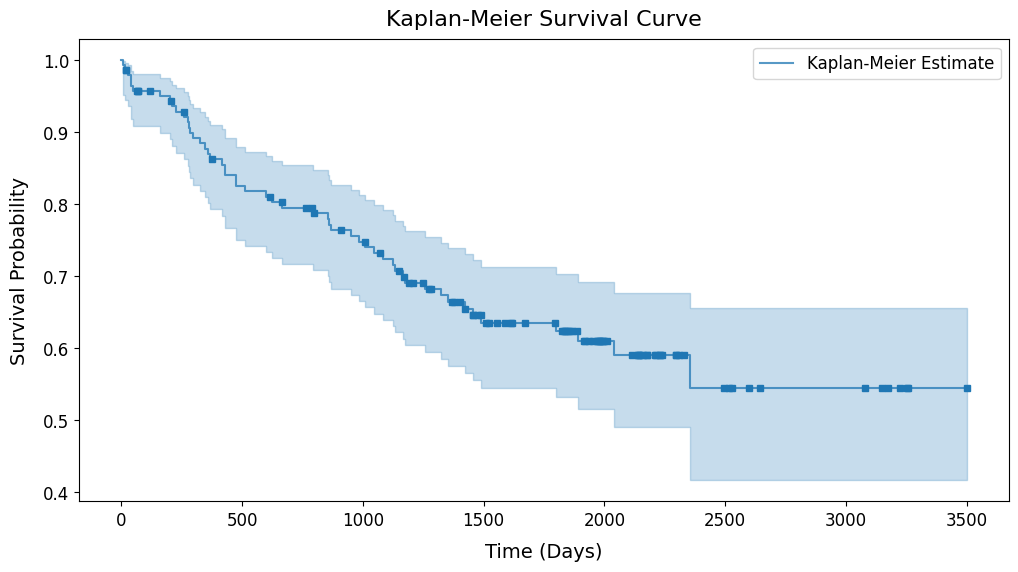

In [4]:
fig = plt.figure(figsize=(12, 6))


T = df["Time_to_Event"]
E = df["Event"]

kmf = KaplanMeierFitter()
kmf.fit(T, E)

kmf.plot(label="Kaplan-Meier Estimate", show_censors=True, censor_styles={'ms': 4, 'marker': 's'}, alpha=0.75)

plt.xlabel('Time (Days)', fontsize=14, labelpad=10)
plt.ylabel('Survival Probability', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.title('Kaplan-Meier Survival Curve', fontsize=16, pad=10)
plt.show()